In [9]:
import numpy as np
import pandas as pd
data=pd.read_csv("daily-minimum-temperatures.csv")
print(data)

            Date  Daily minimum temperatures
0       1/1/1981                        20.7
1       1/2/1981                        17.9
2       1/3/1981                        18.8
3       1/4/1981                        14.6
4       1/5/1981                        15.8
...          ...                         ...
3645  12/27/1990                        14.0
3646  12/28/1990                        13.6
3647  12/29/1990                        13.5
3648  12/30/1990                        15.7
3649  12/31/1990                        13.0

[3650 rows x 2 columns]


In [10]:
print(data.head(5))

       Date  Daily minimum temperatures
0  1/1/1981                        20.7
1  1/2/1981                        17.9
2  1/3/1981                        18.8
3  1/4/1981                        14.6
4  1/5/1981                        15.8


In [11]:
data.describe()

,Daily minimum temperatures
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        3650 non-null   object 
 1   Daily minimum temperatures  3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [13]:
data.isnull().sum()

Date                          0
Daily minimum temperatures    0
dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler

In [18]:
x = data.drop(["Date"], axis=1) 
y = data["Date"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [21]:
print(x_train)

      Daily minimum temperatures
1934                        11.1
2091                         8.6
1228                         6.3
3286                        13.3
179                          9.5
...                          ...
1144                        16.3
1931                        12.4
2350                        13.0
3448                        11.4
1307                        10.6

[2920 rows x 1 columns]


In [22]:
print(x_test)

      Daily minimum temperatures
986                          6.5
2652                        14.7
1930                        12.8
2719                        12.1
912                          9.8
...                          ...
3588                        14.8
979                         11.1
42                          13.9
286                         13.3
294                         11.4

[730 rows x 1 columns]


In [23]:
print(y_train)

1934    4/20/1986
2091    9/24/1986
1228    5/13/1984
3286     1/2/1990
179     6/29/1981
          ...    
1144    2/19/1984
1931    4/17/1986
2350    6/10/1987
3448    6/13/1990
1307    7/31/1984
Name: Date, Length: 2920, dtype: object


In [24]:
print(y_test)

986      9/14/1983
2652      4/7/1988
1930     4/16/1986
2719     6/13/1988
912       7/2/1983
           ...    
3588    10/31/1990
979       9/7/1983
42       2/12/1981
286     10/14/1981
294     10/22/1981
Name: Date, Length: 730, dtype: object


In [25]:
data=data.drop(columns="Date")

In [26]:
from scipy.stats import zscore
data_z = zscore(data)

In [27]:
from sklearn.preprocessing import StandardScaler,normalize
scaler = StandardScaler()
data_s = scaler.fit_transform(data)
data_normal = normalize(data_s)
data_normal = pd.DataFrame(data_normal)

In [28]:
print(data_normal)

        0
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
...   ...
3645  1.0
3646  1.0
3647  1.0
3648  1.0
3649  1.0

[3650 rows x 1 columns]


In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
data_final = pca.fit_transform(data_normal)
data_final = pd.DataFrame(data_final)

In [31]:
print(data_final)

             0
0     1.024658
1     1.024658
2     1.024658
3     1.024658
4     1.024658
...        ...
3645  1.024658
3646  1.024658
3647  1.024658
3648  1.024658
3649  1.024658

[3650 rows x 1 columns]


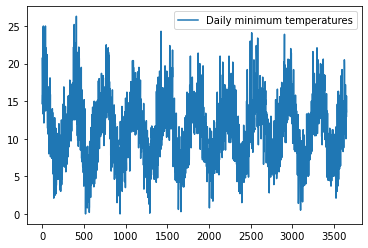

In [36]:
import matplotlib.pyplot as plt
data.plot(y=["Daily minimum temperatures"])
plt.show()